In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from termcolor import colored

# Data Load

In [3]:
data_A = pd.read_csv('data_identificada.csv').drop(['Second_Protocol','Third_Protocol'],axis = 1)
data_B = pd.read_csv('data_no_identificada.csv').drop(['Second_Protocol','Third_Protocol'], axis = 1)

# Data Inspection

### Inspección datos faltantes

In [4]:
avaliable_A = data_A.isnull().sum()
avaliable_A

Netflows             0
First_Protocol       0
p1_d                 0
p2_d                 0
p3_d                 0
duration             0
max_d                0
min_d                0
#packets             0
Avg_bps              0
Avg_pps              0
Avg_bpp              0
#Bytes               0
#sp                  0
#dp                  0
first_sp             0
second_sp           32
third_sp          2171
first_dp             0
second_dp           32
third_dp          2169
p1_ip                0
p2_ip                0
p3_ip                0
p1_ib                0
p2_ib                0
p3_ib                0
Type                 0
Cryptocurrency       0
dtype: int64

In [5]:
avaliable_B = data_B.isnull().sum()
avaliable_B

Name                  0
Netflows              0
First_Protocol        0
p1_d                  0
p2_d                  0
p3_d                  0
duration              0
max_d                 0
min_d                 0
#packets              0
Avg_bps               0
Avg_pps               0
Avg_bpp               0
#Bytes                0
#sp                   0
#dp                   0
first_sp              0
second_sp          7495
third_sp          10953
first_dp              0
second_dp          1705
third_dp           7064
p1_ip                 0
p2_ip                 0
p3_ip                 0
p1_ib                 0
p2_ib                 0
p3_ib                 0
Type                  0
dtype: int64

In [6]:
porce_sec_sp = np.round(avaliable_A['second_sp'] / data_A.shape[0], 2) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   1.0%.


In [7]:
porce_sec_sp = np.round(avaliable_A['second_dp'] / data_A.shape[0], 2) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   1.0%.


In [8]:
porce_sec_sp = np.round(avaliable_B['second_sp'] / data_B.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de    {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de    20.200000000000003%.


In [9]:
porce_sec_sp = np.round(avaliable_B['second_dp'] / data_B.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   4.6%.


### Variable Objetivo

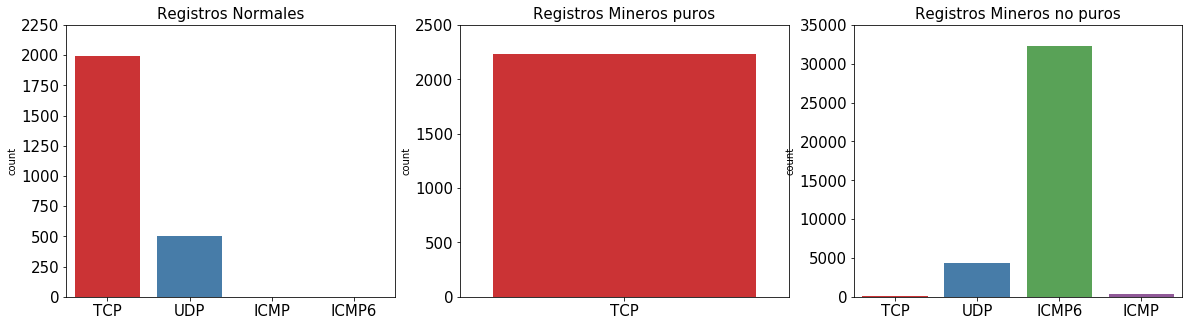

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize = (20,5))
ax = ax.flat
sns.countplot(x='First_Protocol', data=data_A[data_A.Type == 'not_mine'], palette="Set1", ax = ax[0])
sns.countplot(x='First_Protocol', data=data_A[data_A.Type == 'mine'], palette="Set1", ax = ax[1])
sns.countplot(x='First_Protocol', data=data_B, palette="Set1", ax = ax[2])
ax[0].set_title("Registros Normales", size = 15)
ax[1].set_title("Registros Mineros puros", size = 15)
ax[2].set_title("Registros Mineros no puros", size = 15)

ax[0].tick_params(labelsize = 15)
ax[1].tick_params(labelsize = 15)
ax[2].tick_params(labelsize = 15)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_yticks(ax[0].get_yticks())
ax[1].set_yticks(ax[1].get_yticks())
ax[2].set_yticks(ax[2].get_yticks())



ax[0].tick_params(labelsize = 15)
ax[1].tick_params(labelsize = 15)
ax[2].tick_params(labelsize = 15)


In [11]:
Feature_Selection = data_A.select_dtypes(include = ['int64','float64']).columns

In [12]:
Feature_Selection

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


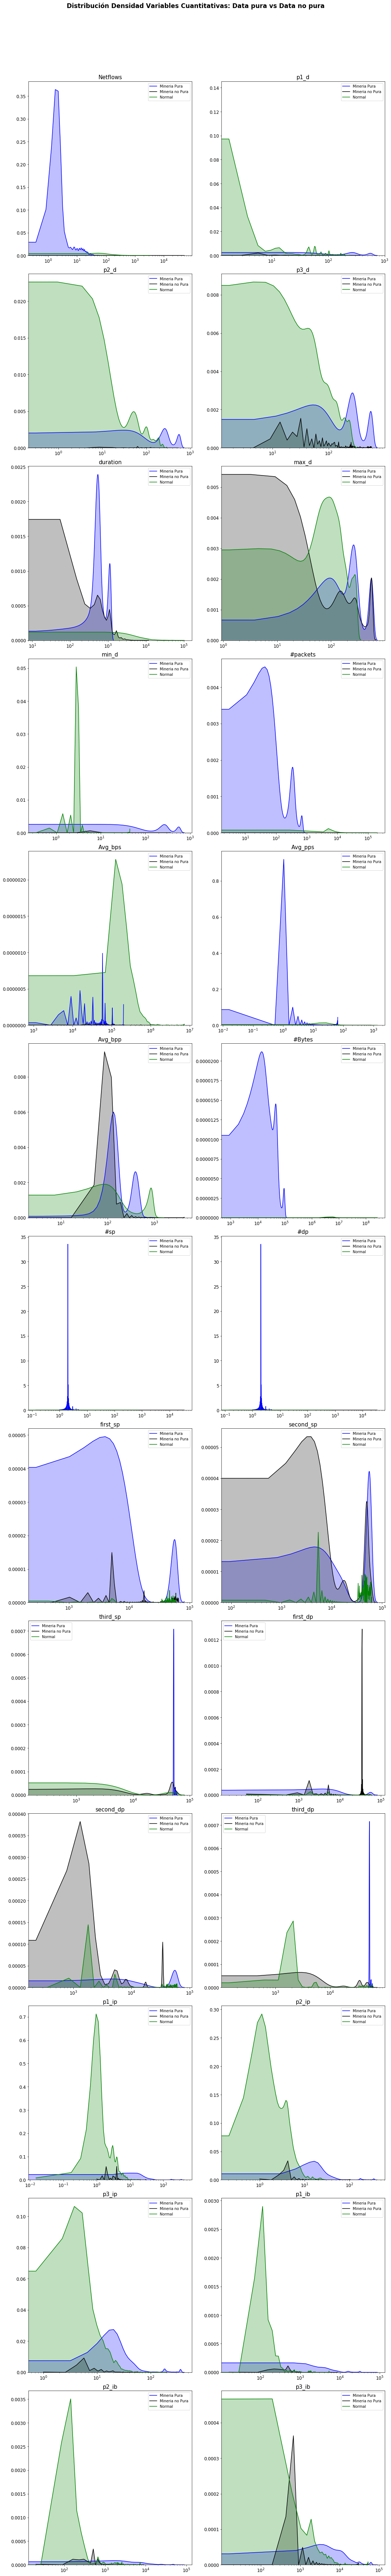

In [13]:
fig, ax = plt.subplots(nrows = 13, ncols = 2, figsize = (15,100))
ax = ax.flat
for i, col in enumerate(Feature_Selection[0:len(Feature_Selection)]):
    sns.kdeplot(data_A[data_A['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i], label = "Mineria Pura")
    sns.kdeplot(data_B[data_B['Type'] == 'mine'][col], color='black', shade=True, ax = ax[i], label = "Mineria no Pura")
    sns.kdeplot(data_A[data_A['Type'] == 'not_mine'][col], color='green', shade=True, ax = ax[i], label = "Normal")
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()
    ax[i].set(xscale="log")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Data pura vs Data no pura', fontsize = 17, fontweight = "bold");


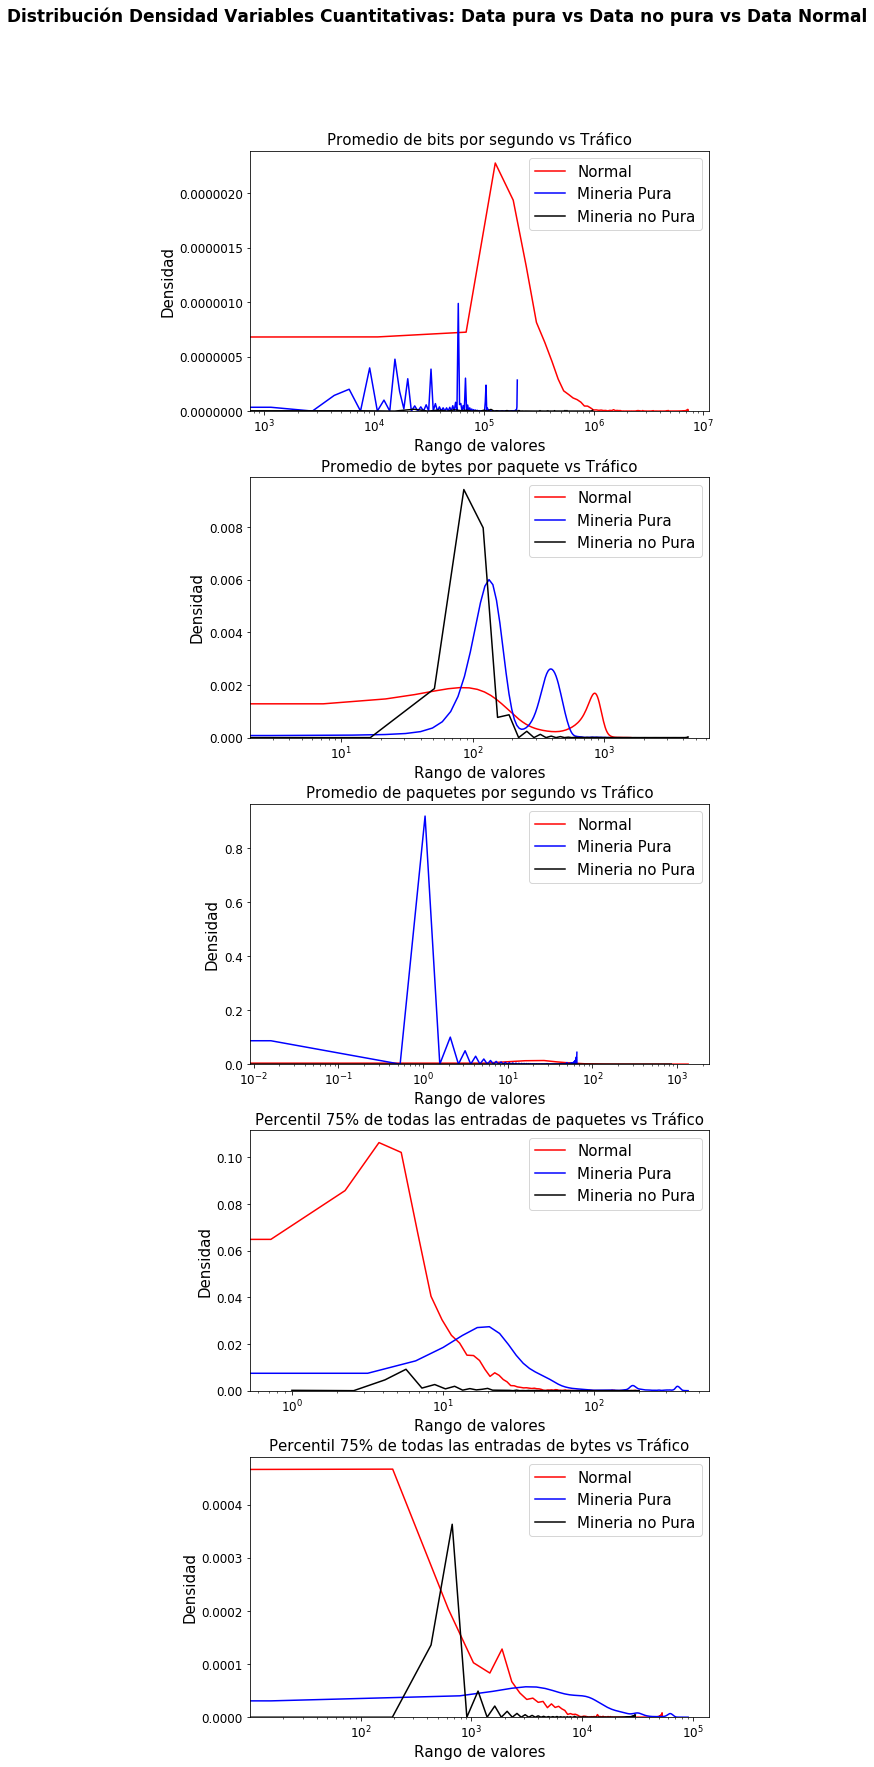

In [20]:
best_feature_pure = ['Avg_bps','Avg_bpp','Avg_pps','p3_ip','p3_ib']
names = ['Promedio de bits por segundo', 'Promedio de bytes por paquete', 'Promedio de paquetes por segundo','Percentil 75% de todas las entradas de paquetes', 'Percentil 75% de todas las entradas de bytes']

fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (8,25))
ax = ax.flat
for i, col in enumerate(best_feature_pure):
    sns.kdeplot(data_A[data_A['Type'] == 'not_mine'][col], color='red', shade=False, ax = ax[i], label = "Normal")
    sns.kdeplot(data_A[data_A['Type'] == 'mine'][col], color='blue', shade=False, ax = ax[i], label = "Mineria Pura")
    sns.kdeplot(data_B[data_B['Type'] == 'mine'][col], color='black', shade=False, ax = ax[i], label = "Mineria no Pura")
   
    ax[i].set_title(f'{names[i]} vs Tráfico', size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("Rango de valores", fontsize=15)
    ax[i].set_ylabel("Densidad",fontsize=15)
    ax[i].legend(fontsize = 15)
    ax[i].set(xscale="log")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Data pura vs Data no pura vs Data Normal', fontsize = 17, fontweight = "bold");



In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

best_feature_pure = ['Avg_bps','Avg_bpp','p3_ip','p3_ib']

preprocesador = ColumnTransformer([
    ('scale', StandardScaler(), best_feature_pure)
], remainder = 'passthrough')

In [16]:
valueA = preprocesador.fit_transform(data_A[best_feature_pure])
valueB = preprocesador.fit_transform(data_B[best_feature_pure])
valueA = pd.DataFrame(valueA, columns = best_feature_pure )
valueB = pd.DataFrame(valueB, columns = best_feature_pure)

In [17]:
valueA = pd.concat([valueA,data_A['Type']],axis = 1)
valueB = pd.concat([valueB,data_B['Type']],axis = 1)

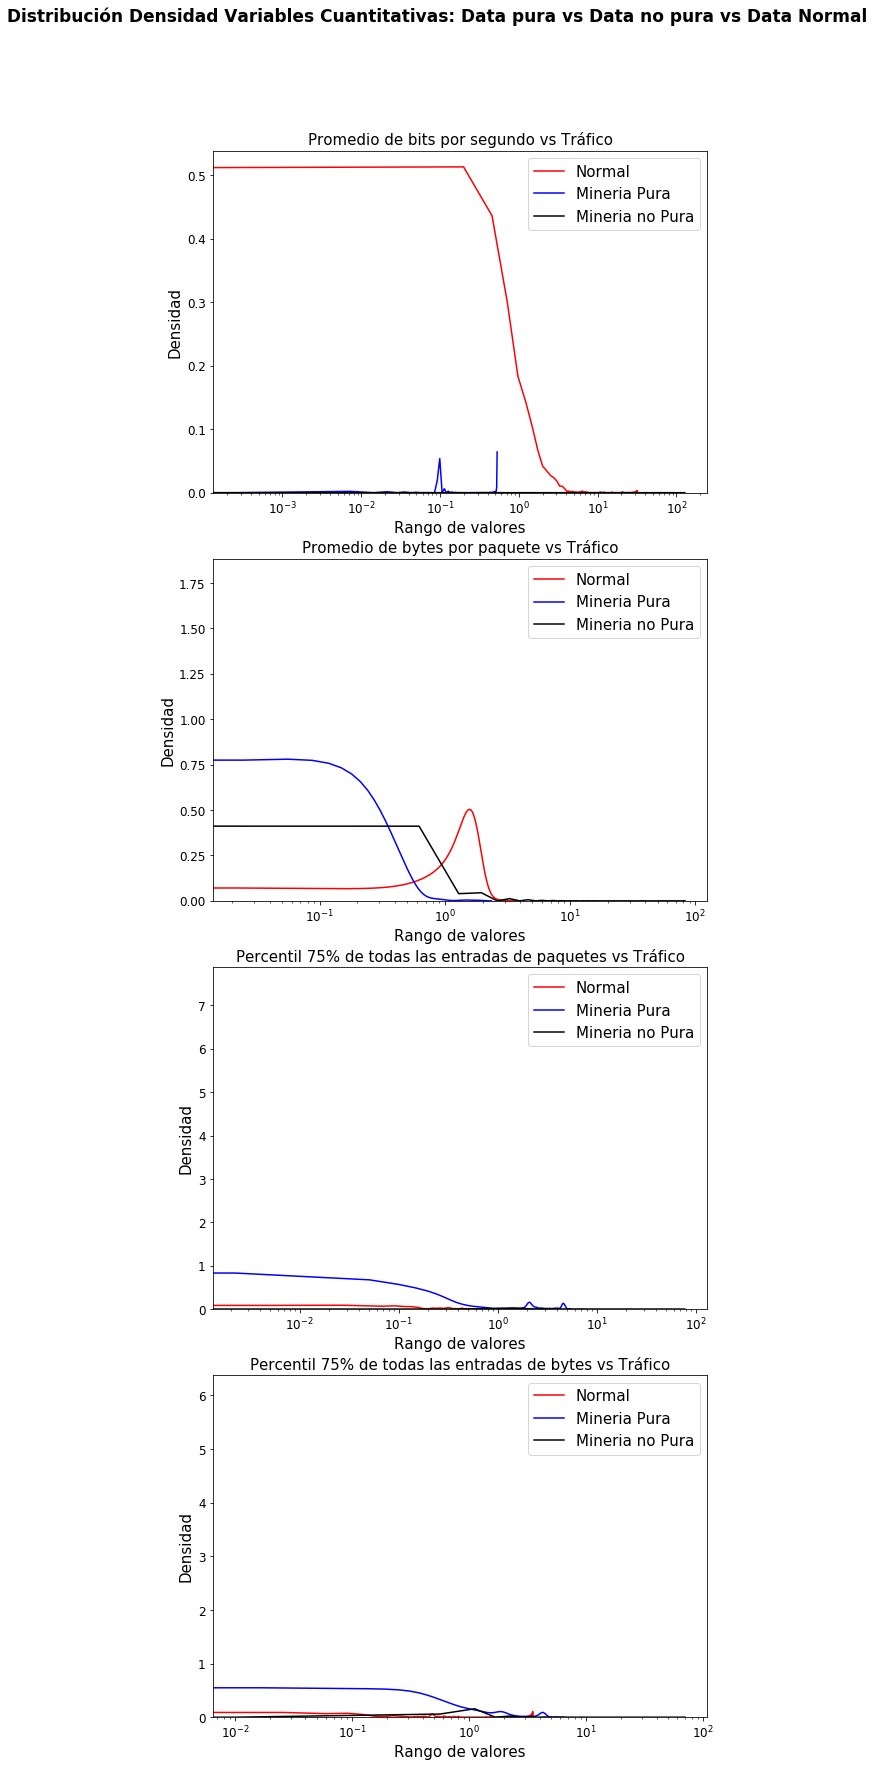

In [18]:
best_feature_pure = ['Avg_bps','Avg_bpp','p3_ip','p3_ib']
names = ['Promedio de bits por segundo', 'Promedio de bytes por paquete','Percentil 75% de todas las entradas de paquetes', 'Percentil 75% de todas las entradas de bytes']

fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (8,25))
ax = ax.flat
for i, col in enumerate(best_feature_pure):
    sns.kdeplot(valueA[valueA['Type'] == 'not_mine'][col], color='red', shade=False, ax = ax[i], label = "Normal")
    sns.kdeplot(valueA[valueA['Type'] == 'mine'][col], color='blue', shade=False, ax = ax[i], label = "Mineria Pura")
    sns.kdeplot(valueB[valueB['Type'] == 'mine'][col], color='black', shade=False, ax = ax[i], label = "Mineria no Pura")
   
    ax[i].set_title(f'{names[i]} vs Tráfico', size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("Rango de valores", fontsize=15)
    ax[i].set_ylabel("Densidad",fontsize=15)
    ax[i].legend(fontsize = 15)
    ax[i].set_xticks([10])
    ax[i].set(xscale="log")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Data pura vs Data no pura vs Data Normal', fontsize = 17, fontweight = "bold");

In [19]:
sns.scatterplot(x="first_sp", y=data_A, data=data_A)

ValueError: could not broadcast input array from shape (4733) into shape (29)